# Machine learning

## Régression linéaire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Récupérer les données

In [2]:
pub=pd.read_csv("../Data/Advertising.csv",index_col=0)

In [3]:
pub.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



créer un modèle linéaire

In [4]:
from statsmodels.formula.api import ols

In [5]:
modele=ols("Sales ~ TV + Newspaper + Radio",data=pub).fit()

In [6]:
modele.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        16:49:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
modele.params

Intercept    2.938889
TV           0.045765
Newspaper   -0.001037
Radio        0.188530
dtype: float64

Avec scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# on crée un objet de la classe LinearRegression
modele_lineaire=LinearRegression()

In [10]:
modele_lineaire.fit(pub.drop(columns="Sales"),pub["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
modele_lineaire.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(pub["Sales"],modele_lineaire.predict(pub.drop("Sales",axis=1)))

0.8972106381789522

## ACP

In [14]:
from sklearn.decomposition import PCA
from keras.datasets import fashion_mnist

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
# on récupère les données dans 4 arrays
(train_img, train_lbl), (test_img, test_lbl)=fashion_mnist.load_data()

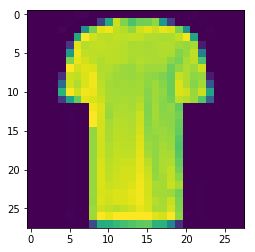

In [16]:
# ayant 28 x 28 pixels en noir et blanc
plt.imshow(train_img[1800])

In [17]:
# on passe les images en deux dimensions
img_acp=train_img.reshape(train_img.shape[0],-1)


In [18]:
# on crée un modèle d’ACP
pca=PCA(n_components=.80)
# on réduit le nombre de dimensions avec l’ACP
donnees_reduites=pca.fit_transform(img_acp)


# on projette les données réduites dans l’espace d’origine
projection=pca.inverse_transform(donnees_reduites)

Text(0.5,1,'80.0% de variance expliquée')

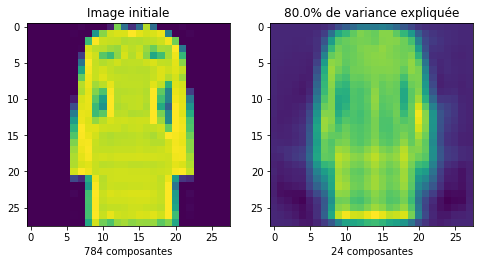

In [19]:
# on affiche les résultats
plt.figure(figsize=(8,4))
# image initale
plt.subplot(1, 2, 1)
plt.imshow(img_acp[500].reshape(28,28))
plt.xlabel('%i composantes'%(img_acp.shape[1]))
plt.title('Image initiale')
# image basée sur l’ACP
plt.subplot(1, 2, 2);
plt.imshow(projection[500].reshape(28, 28))
plt.xlabel('%i composantes' %(donnees_reduites.shape[1]))
plt.title('%s de variance expliquée'%(str(pca.n_components*100)+"%"))

## Kmeans

In [20]:
from sklearn.cluster import KMeans

On génère des données

In [21]:
from sklearn.datasets import make_blobs

In [22]:
x,y=make_blobs(n_samples=10000,n_features=6,centers=4,cluster_std=3.5)

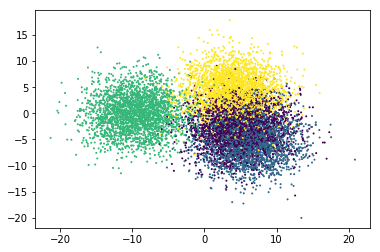

In [23]:
plt.scatter(x[:,3],x[:,0],c=y,s=1)

In [24]:
modele_km=KMeans(n_clusters=4)

In [25]:
modele_km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

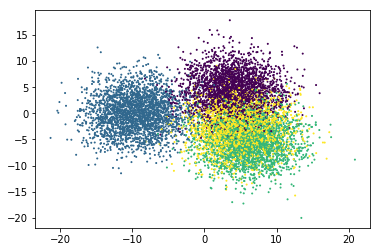

In [26]:
plt.scatter(x[:,3],x[:,0],c=modele_km.labels_,s=1)

In [27]:
pd.crosstab(modele_km.labels_,y)

col_0,0,1,2,3
row_0,,,,
0,1,62,1,2429
1,1,0,2496,1
2,10,2429,2,65
3,2488,9,1,5


On prend des données des communes d'Ile de France

In [28]:
communes_idf=pd.read_csv("../Data/base-dpt.csv",sep=";")

In [29]:
communes_idf.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'P14_POP', 'P09_POP', 'SUPERF',
       'NAIS0914', 'DECE0914', 'P14_MEN', 'NAISD16', 'DECESD16', 'P14_LOG',
       'P14_RP', 'P14_RSECOCC', 'P14_LOGVAC', 'P14_RP_PROP', 'NBMENFISC14',
       'PIMP14', 'MED14', 'TP6014', 'P14_EMPLT', 'P14_EMPLT_SAL', 'P09_EMPLT',
       'P14_POP1564', 'P14_CHOM1564', 'P14_ACT1564', 'ETTOT15', 'ETAZ15',
       'ETBE15', 'ETFZ15', 'ETGU15', 'ETGZ15', 'ETOQ15', 'ETTEF115',
       'ETTEFP1015', 'Geo Shape', 'geo_point_2d'],
      dtype='object')

In [30]:
x=communes_idf[communes_idf.columns[4:-2]]

In [31]:
x=x.fillna(x.mean())

On crée un modèle de k-means

In [32]:
modele_km=KMeans(n_clusters=3)

In [33]:
modele_km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
pd.DataFrame(modele_km.cluster_centers_,columns=x.columns)

,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,NAISD16,DECESD16,P14_LOG,P14_RP,...,P14_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015
0,40483.937931,39301.993103,8.103034,3346.034483,1162.427586,16628.113277,659.227586,240.903448,18159.294562,16628.113277,...,20167.246204,4097.227586,5.910345,132.558621,387.489655,3101.110345,667.544828,470.158621,929.393103,248.193103
1,3265.344872,3157.004197,9.437357,215.335696,100.251886,1275.697414,42.419813,21.720591,1391.526934,1275.697414,...,1622.966898,264.667863,5.113903,11.323961,31.336563,181.845157,44.828724,35.048280,57.892483,16.041187
2,137362.055556,137059.166667,7.491111,10112.166667,4198.111111,67992.814841,1928.444444,845.777778,78713.812729,67992.814841,...,73967.217455,27869.055556,27.111111,769.444444,1447.666667,22967.055556,3076.277778,2657.777778,6027.388889,1308.388889


In [35]:
communes_idf["classe"]=modele_km.labels_

In [36]:
communes_idf.groupby("classe")["DECE0914"].mean()

classe
0    1162.427586
1      99.788360
2    4198.111111
Name: DECE0914, dtype: float64

### Traitement d'image avec python

In [37]:
from imageio import imread

On peut réduire la taille de l'image (on conserve un pixel sur 3)

In [38]:
image_ny=imread("../Data/New York.jpg")

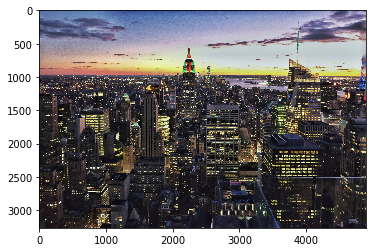

In [39]:
plt.imshow(image_ny)

In [40]:
image_ny.shape

(3264, 4896, 3)

In [41]:
image_ny=image_ny[::3,::3]

In [42]:
image_ny.shape

(1088, 1632, 3)

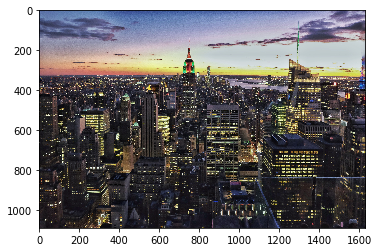

In [43]:
plt.imshow(image_ny)

on transforme les données en un tableau à deux dimensions avec des valeurs entre 0 et 1


In [44]:
array_ny=image_ny.reshape(-1,3)/255

In [45]:
array_ny.shape

(1775616, 3)

on va réduire le nombre de couleurs à 5


In [46]:
modele_ny=KMeans(n_clusters=5)

In [47]:
modele_ny.fit(array_ny)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
label=modele_ny.labels_

In [49]:
center=modele_ny.cluster_centers_

In [50]:
new_image=center[label]

In [51]:
new_ny=(new_image*255).reshape(image_ny.shape).astype("uint8")

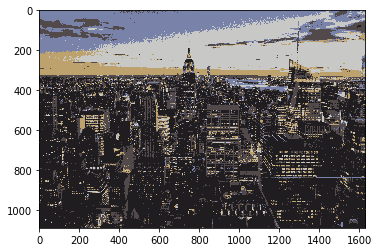

In [52]:
plt.imshow(new_ny)

## L'analyse du churn

On veut analyser le churn sur des données de telecom

In [53]:
telecom=pd.read_csv("../Data/telecom.csv")

In [54]:
telecom.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
x=telecom[['Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']]


In [58]:
#y=np.where(telecom["Churn?"]=="True.",1,0)

In [59]:
encode_y=LabelEncoder()
y=encode_y.fit_transform(telecom["Churn?"])

In [60]:
np.unique(y)

array([0, 1], dtype=int64)

On sépare les données en apprentissage  / test

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

On va appliquer 2 modèles différents

In [63]:
modele_rf=RandomForestClassifier(n_estimators=100)
modele_svm=SVC()

In [64]:
modele_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
modele_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

On évalue la qualité de ces modèles

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score

In [67]:
accuracy_score(y_test,modele_rf.predict(x_test))

0.91

In [68]:
accuracy_score(y_test,modele_svm.predict(x_test))

0.852

In [69]:
confusion_matrix(y_test,modele_rf.predict(x_test))

array([[833,  19],
       [ 71,  77]], dtype=int64)

In [70]:
confusion_matrix(y_test,modele_svm.predict(x_test))

array([[852,   0],
       [148,   0]], dtype=int64)

In [71]:
print(classification_report(y_test,modele_svm.predict(x_test)))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       852
          1       0.00      0.00      0.00       148

avg / total       0.73      0.85      0.78      1000



C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


On peut aussi faire de la validation croisée

### Recherche d'hyper-paramètres avec du Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

#on crée un dictionnaire pour la grille
grid_rf={"n_estimators":[10,100,1000], "max_depth":[3,5,7]}

#on crée le modèle de recherche
modele_grid=GridSearchCV(modele_rf,grid_rf,scoring="roc_auc",cv=4)

#on ajuste sur les données d'apprentissage
modele_grid.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [74]:
modele_grid.best_params_

{'max_depth': 7, 'n_estimators': 1000}

In [75]:
modele_grid.grid_scores_

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.81927, std: 0.03387, params: {'max_depth': 3, 'n_estimators': 10},
 mean: 0.84306, std: 0.02598, params: {'max_depth': 3, 'n_estimators': 100},
 mean: 0.84044, std: 0.03143, params: {'max_depth': 3, 'n_estimators': 1000},
 mean: 0.84196, std: 0.01715, params: {'max_depth': 5, 'n_estimators': 10},
 mean: 0.84897, std: 0.02909, params: {'max_depth': 5, 'n_estimators': 100},
 mean: 0.85647, std: 0.02287, params: {'max_depth': 5, 'n_estimators': 1000},
 mean: 0.85349, std: 0.02239, params: {'max_depth': 7, 'n_estimators': 10},
 mean: 0.86036, std: 0.02118, params: {'max_depth': 7, 'n_estimators': 100},
 mean: 0.86377, std: 0.02164, params: {'max_depth': 7, 'n_estimators': 1000}]

In [76]:
print(roc_auc_score(y_test,modele_grid.predict(x_test)))

0.7231315822865119
